***EDA on the Global Terrorism Dataset***

**LGMVIPOCTOBER : Task 1 (2.Intermediate Level Task)**

**Data Science Internship**

**Name: UROOJ KHAN** 

**EDA on the Global Terrorism Dataset**

**Dataset:**https://bit.ly/2TK5Xn5

**Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

**Reading the Dataset**

In [ ]:
data = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


**Renaming all column names**

In [ ]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [ ]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [ ]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


**Exploratory Data Analysis**

In [ ]:
data.shape

(5096, 18)

In [ ]:
data.isnull().sum()

Year             0
Month            0
day              0
Country          0
State           13
Region           0
City             0
latitude        90
longitude       90
Attacktype       0
kill           612
Wound         1788
target1         57
summary       4298
Group            1
Targettype       1
Weapon           1
motive        4560
dtype: int64

**Combine the Data**

In [ ]:
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)

In [ ]:
data['Casualities'] = data['kill'] + data['Wound']

In [ ]:
data.isnull().sum()

Year              0
Month             0
day               0
Country           0
State            13
Region            0
City              0
latitude         90
longitude        90
Attacktype        0
kill              0
Wound             0
target1          57
summary        4298
Group             1
Targettype        1
Weapon            1
motive         4560
Casualities       0
dtype: int64

**Drop the Columns**

In [ ]:
data.drop(['motive','summary','latitude','longitude'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         5096 non-null   int64  
 1   Month        5096 non-null   int64  
 2   day          5096 non-null   int64  
 3   Country      5096 non-null   object 
 4   State        5083 non-null   object 
 5   Region       5096 non-null   object 
 6   City         5096 non-null   object 
 7   Attacktype   5096 non-null   object 
 8   kill         5096 non-null   float64
 9   Wound        5096 non-null   float64
 10  target1      5039 non-null   object 
 11  Group        5095 non-null   object 
 12  Targettype   5095 non-null   object 
 13  Weapon       5095 non-null   object 
 14  Casualities  5096 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 597.3+ KB


In [ ]:
data.describe()

,Year,Month,day,kill,Wound,Casualities
count,5096.000000,5096.000000,5096.000000,5096.000000,5096.000000,5096.000000
mean,1973.809066,6.158359,15.303375,0.647567,0.719192,1.366758
std,2.337862,3.293888,9.140459,3.033054,7.164589,8.232747
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1972.000000,3.000000,7.000000,0.000000,0.000000,0.000000
50%,1974.000000,6.000000,15.000000,0.000000,0.000000,0.000000
75%,1976.000000,9.000000,23.000000,1.000000,0.000000,1.000000
max,1977.000000,12.000000,31.000000,92.000000,285.000000,295.000000


**Visualization**

In [ ]:
attack = data.Country.value_counts()[:5]
attack

United States     1259
United Kingdom    1245
Italy              368
Spain              345
Argentina          279
Name: Country, dtype: int64

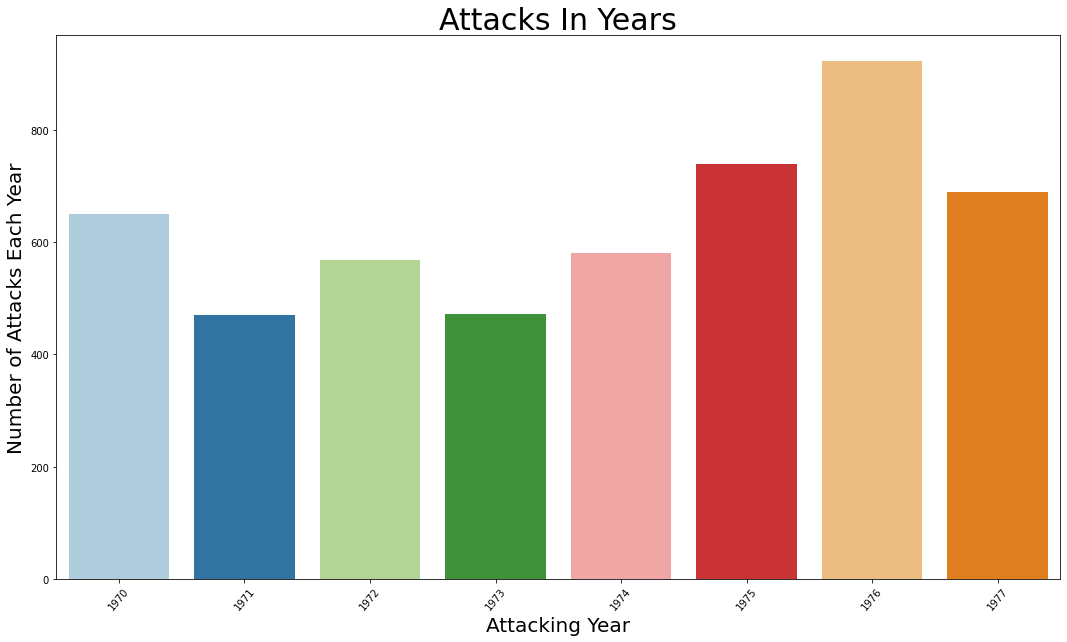

In [ ]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "Paired")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

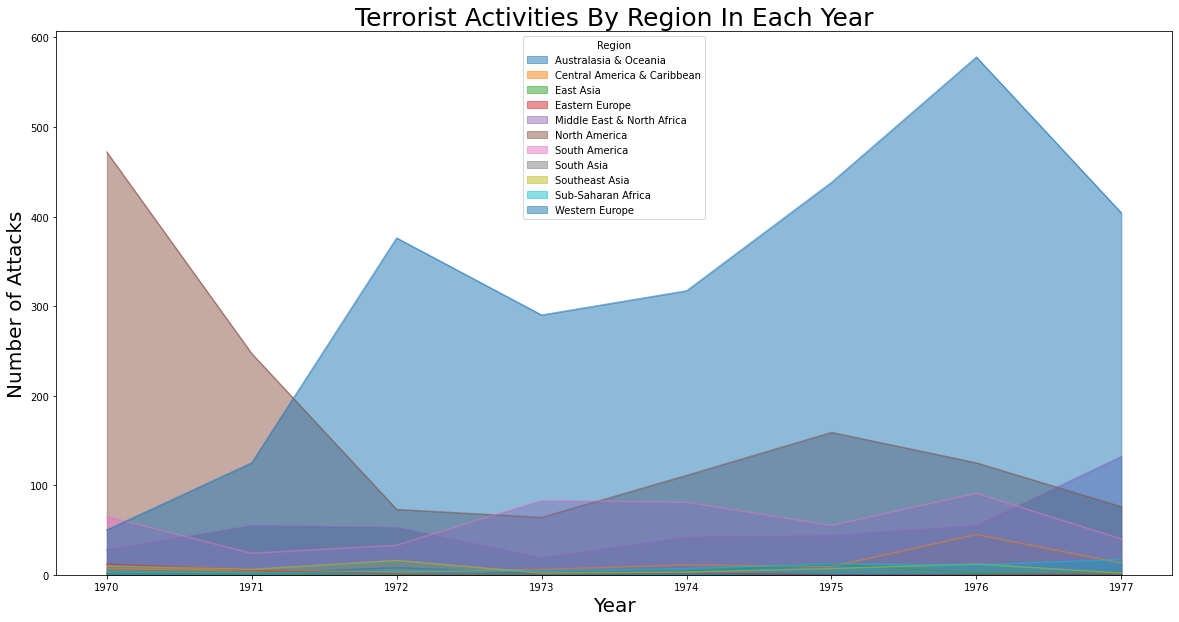

In [ ]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

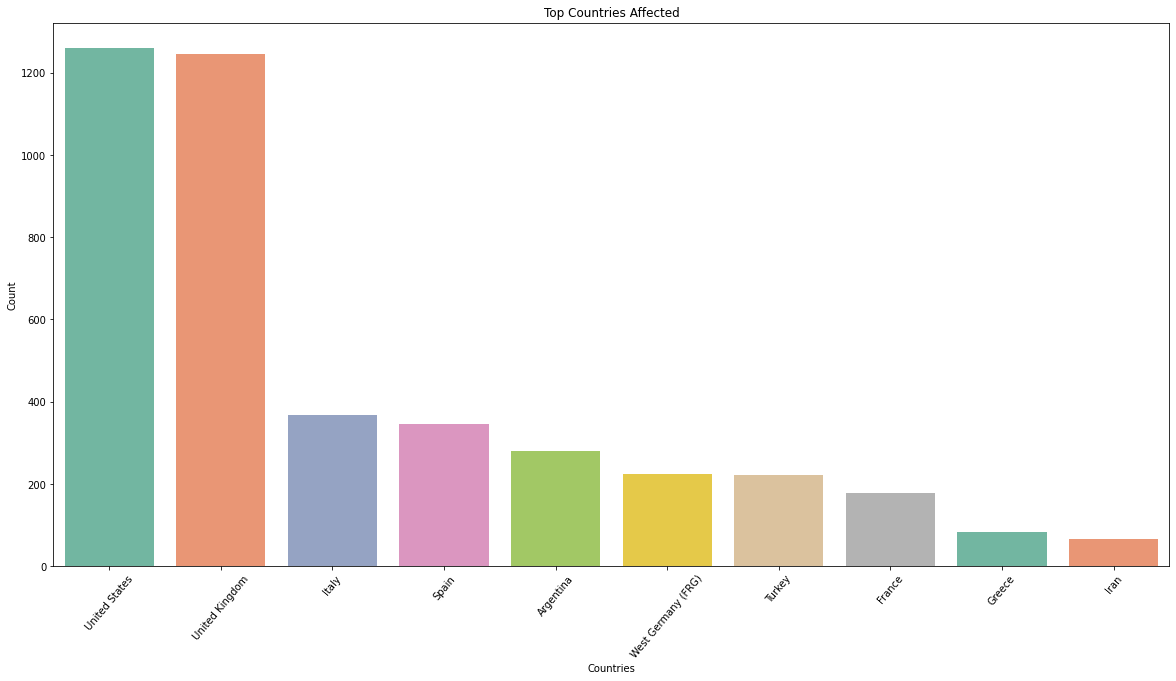

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette="Set2")
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

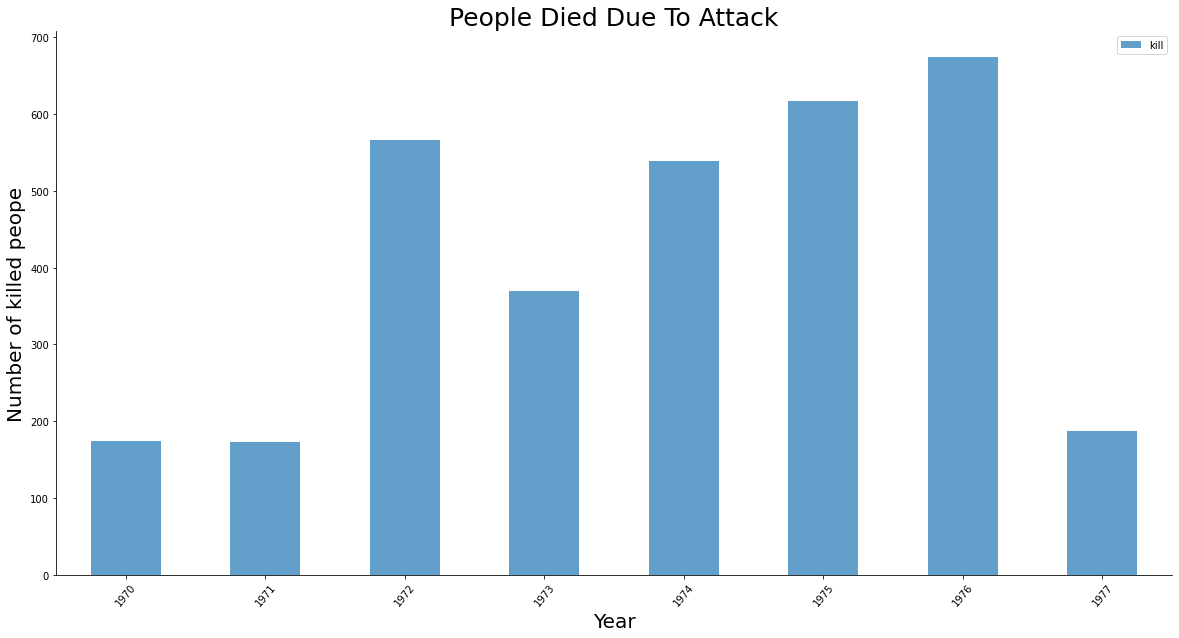

In [ ]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

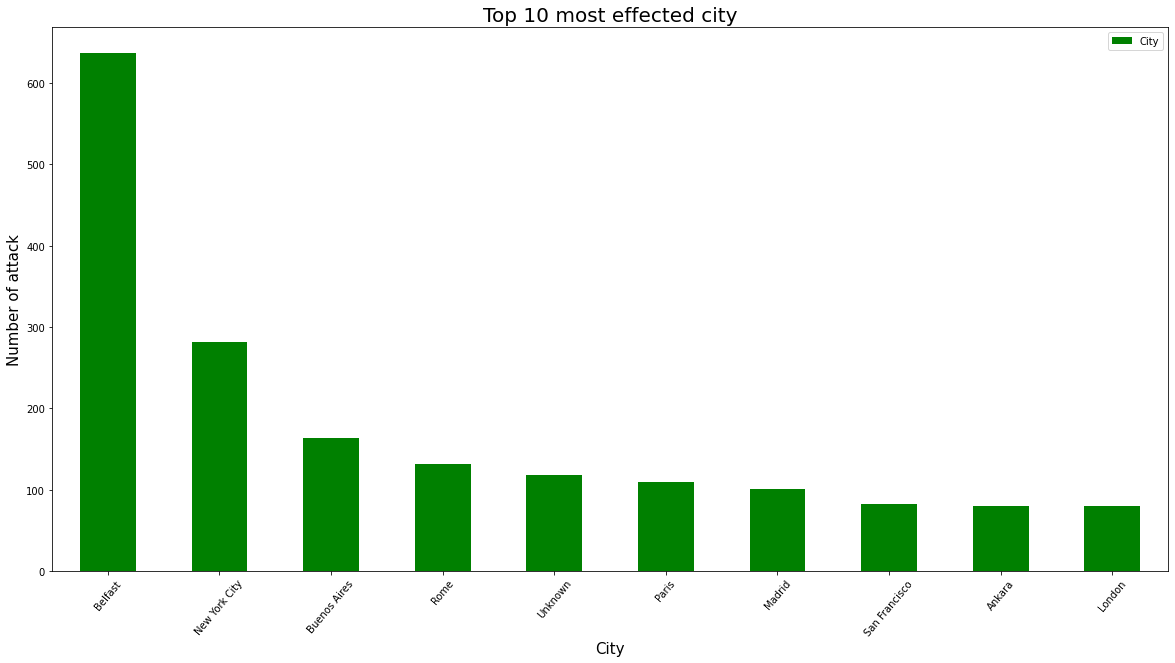

In [ ]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color="Green")
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

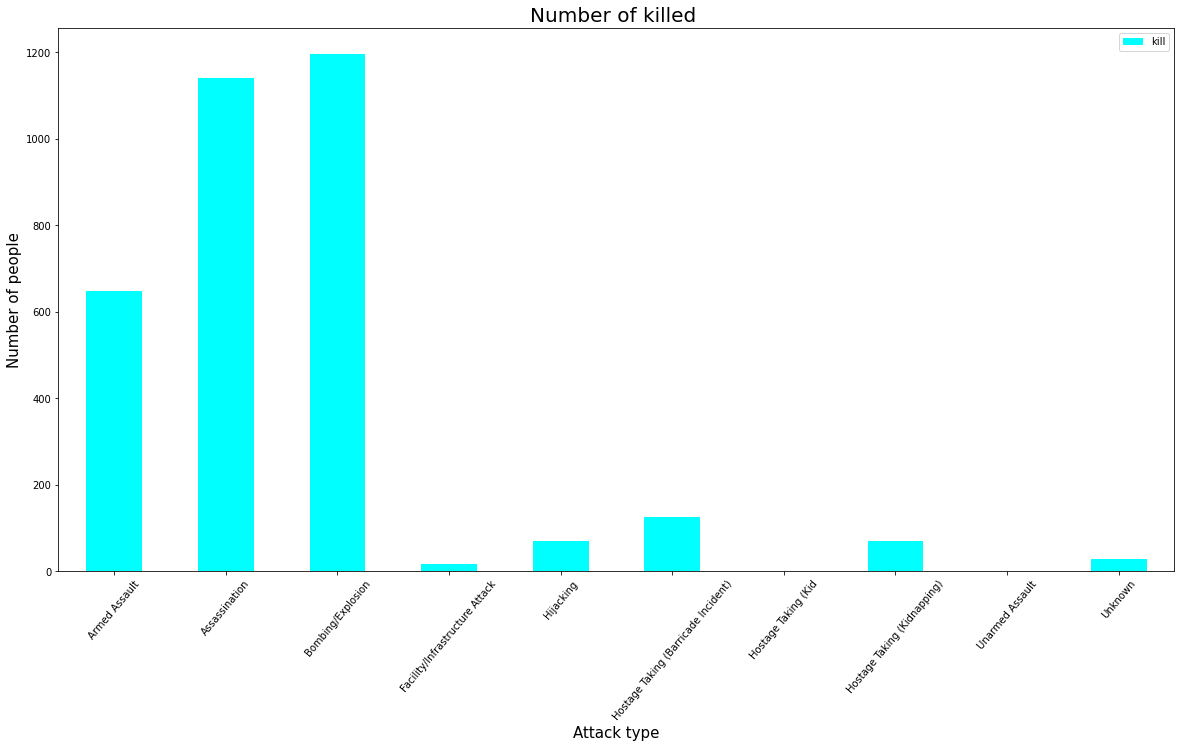

In [ ]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color="Cyan")
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()


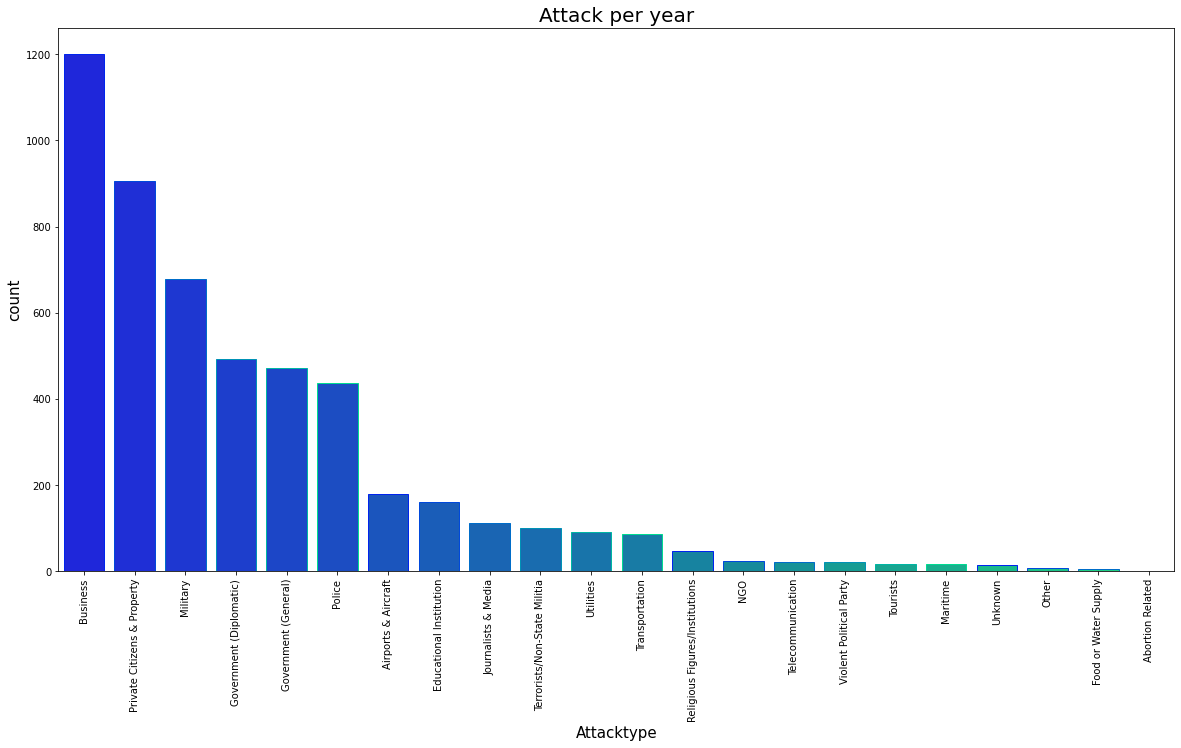

In [ ]:
plt.subplots(figsize=(20,10))
sns.countplot(data["Targettype"],order=data['Targettype'].value_counts().index,palette="winter",edgecolor=sns.color_palette("winter"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

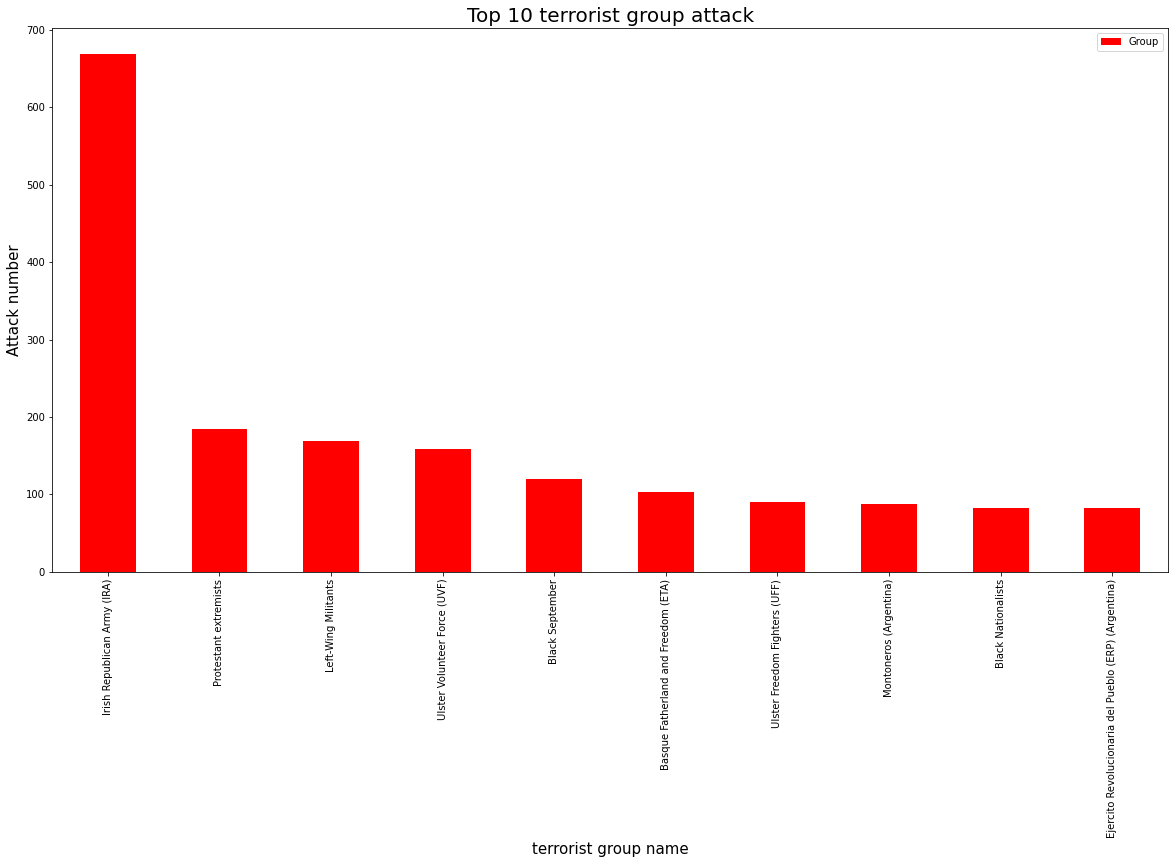

In [ ]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

In [ ]:
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Irish Republican Army (IRA),United Kingdom,804.0
1,Ulster Volunteer Force (UVF),United Kingdom,231.0
2,Protestant extremists,United Kingdom,214.0
3,Montoneros (Argentina),Argentina,187.0
4,Ulster Freedom Fighters (UFF),United Kingdom,100.0
5,"Popular Front for the Liberation of Palestine,...",Greece,88.0
6,Irish Republican Extremists,United Kingdom,75.0
7,Coordination of the United Revolutionary Organ...,Barbados,73.0
8,23rd of September Communist League,Mexico,63.0
9,Basque Fatherland and Freedom (ETA),Spain,52.0


**Conclusion:**

The country which is mostly attacked is Iraq.

Most attacked city is Baghdad which comes in the country Iraq.

2014 is the year where most attacks took place.

The Region with the most attacks are Middle East & North Africa.

Taliban is the group with most attacks.